In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [50]:
#Packages to load in for the competition
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from yellowbrick.features import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [51]:
#Functions to use for the ML competition
def missingValues(data):
    for col in data.columns:
        print(col)
        print(sum(data[col].isnull()))
        
def categoricalToBinary(data):
    label_encoder = LabelEncoder()
    return label_encoder.fit_transform(data)


In [52]:
#Loading in the training and testing datasets
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

# **Observing the Training and Testing Sets**

In [53]:
#Sneak peek of the Training Set and its variables datatypes
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
#Sneak peek of the Testing Set and its variables datatypes
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


From what we see here, we see about 10 variables within the training and testing datasets with varying number of numerical, identifier, and categorical data types. Additionally, there are variables that have missing values in both datasets. Let's observe further on the exact data types of the variables. 

In [55]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [56]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

*Note for the testing set, there is no Survival information for the passenger. We are going to perform Machine Learning algorithms to be able to predict this information based on the selected variables we choose for both training and testing datasets.

# **Exploratory Data Analysis (EDA) and Recoding the Training and Testing Datasets**

1. Right now, from what we see from the training and testing datasets, we need to eliminate any variables that are going to be irrelavant for our machine learning algorithms which will predict survival of a passenger. The variables we are going to drop from the training and testing datasets are Name, Ticket, and Cabin.

2. Recoding categorical variables (i.e. Sex and Embarked) using the appropriate procedures

3. After dropping the variables, perform EDA on only the training dataset to find any interesting insights within the data.
 
4. Let's observe the number of missing values in each variable in the dataset using a predefined function I made up. 

5. Use appropriate procedures based on our findings from EDA to be able to fill in the missing data in the training and testing datasets. 


In [57]:
#Dropping variables from the Training and Testing sets
df_train = train.copy()
df_test = test.copy()
df_train = df_train.drop(["Name", "Ticket", "Cabin"], axis = 1)
df_test = df_test.drop(["Name", "Ticket", "Cabin"], axis = 1)

**Recoding the Sex and Embarked Categorical variables**
1. For the sex variable in the training and testing datasets, recode the value "male" = 1 and "female" = 0 using a  predefined function I made above in this notebook.

2. Now for each Embarked value in the training and testing datasets, make new columns for each of them where if that particular value is True, then the value is 1. Otherwise, it is 0. 

In [58]:
#Recoding all the categorical values for supervised learning
df_train["Sex"] = categoricalToBinary(df_train["Sex"])
df_train["Embarked_C"] = np.where(df_train["Embarked"].str.contains("C"), 1, 0)
df_train["Embarked_S"] = np.where(df_train["Embarked"].str.contains("S"), 1, 0)
df_train["Embarked_Q"] = np.where(df_train["Embarked"].str.contains("Q"), 1, 0)
df_train = df_train.drop("Embarked", axis =1)

df_test["Sex"] = categoricalToBinary(df_test["Sex"])
df_test["Embarked_C"] = np.where(df_test["Embarked"].str.contains("C"), 1, 0)
df_test["Embarked_S"] = np.where(df_test["Embarked"].str.contains("S"), 1, 0)
df_test["Embarked_Q"] = np.where(df_test["Embarked"].str.contains("Q"), 1, 0)
df_test = df_test.drop("Embarked", axis = 1)

In [59]:
#Summarize the dataset
df_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S,Embarked_Q
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.190797,0.725028,0.088664
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.393150,0.446751,0.284418
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,0.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Frequencies of Passengers who Survived or Not Survived the Titanic')

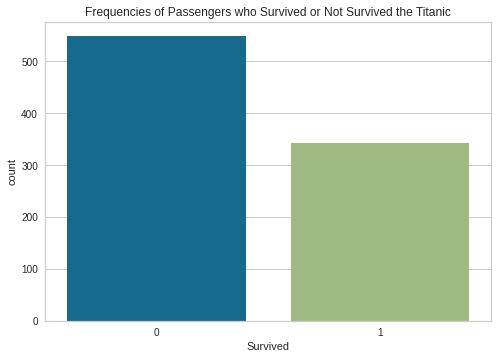

In [60]:
#Exploratory Data Analysis (EDA): Frequencies on the number of passengers who survived or not survived the Titanic
sns.countplot(x = "Survived",data = df_train)
plt.title("Frequencies of Passengers who Survived or Not Survived the Titanic")

From the training set, we can see that more passengers died than compared to passengers who lived. Now lets take it a step further and lets see how each passenger survived based on age.

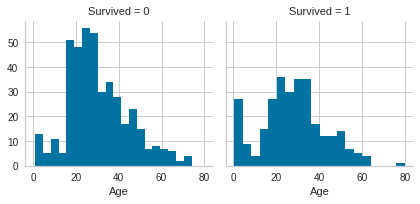

In [61]:
# Seeing the distribution of people who survived or not survived based on age
grid = sns.FacetGrid(df_train, col='Survived')
grid.map(plt.hist, 'Age', bins=20)

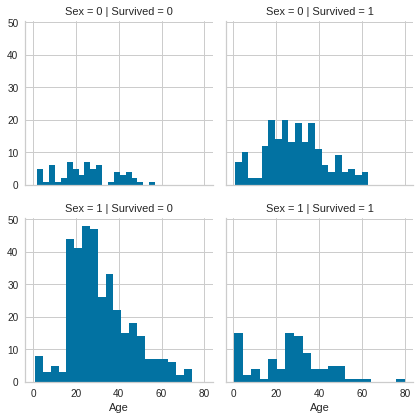

In [62]:
# Similar results grouped by sex
grid = sns.FacetGrid(df_train, col='Survived', row='Sex')
grid.map(plt.hist, 'Age', bins=20)

From what we saw from the first facet histogram plots, we did not see any interesting insights from the data except that majority of passengers who did not survive were around ~20-40 years old. However, interestingly enough we found that more males died, who are around 20-40 years old, compared to females in the training dataset. Lets investigate other categorical variables and see how do they influence the survival of a passenger.

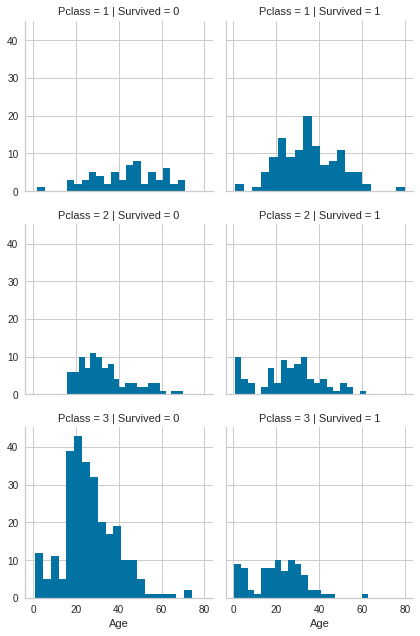

In [63]:
# Histogram based on Survival, Pclass, and age variables
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', bins=20)

Another interesting insight is that passengers who are in Pclass = 3 (i.e. the lowest socioeconomic passenger class in the training dataset) are associated with the most deaths from the Titanic incident.

Summarizing from what we found in the Training dataset here are the few things that we have found:

**1. More males died, who are around 20-40 years old, compared to females in the training dataset**

**2.Passengers who are in Pclass = 3 (i.e. the lowest socioeconomic passenger class in the training dataset) are associated with the most deaths from the Titanic incident.**

This information will be useful for filling in missing values in the dataset.

In [64]:
#Checking over missing values for the training dataset
print('---Missing values for the Titanic training dataset---')
missingValues(df_train)

---Missing values for the Titanic training dataset---
PassengerId
0
Survived
0
Pclass
0
Sex
0
Age
177
SibSp
0
Parch
0
Fare
0
Embarked_C
0
Embarked_S
0
Embarked_Q
0


In [65]:
#Checking over missing values for the testing dataset
print('---Missing values for the Titanic testing dataset---')
missingValues(df_test)

---Missing values for the Titanic testing dataset---
PassengerId
0
Pclass
0
Sex
0
Age
86
SibSp
0
Parch
0
Fare
1
Embarked_C
0
Embarked_S
0
Embarked_Q
0


As we can see here, the training set has one variable (i.e. Age) that have missing values. In the testing set, we can see that we have also two variables (i.e. Age and fare) that have missing values. For the testing set, it is relatively easy to fill these missing values since they are both numerical variables.


**Filling in missing fare value for the testing dataset**

* Just use the mean fare value to impute that one missing value for that one passenger in the testing dataset.

In [66]:
#Filling in missing fare value for the testing dataset
test_mean_fare = df_test["Fare"].mean()
df_test = df_test.fillna(test_mean_fare)

**Filling in missing age values for the training and testing datasets**

There are many ways to approach this problem. One of the easiest ways to go about this is just imputing the median age value for each of the missing values of the training and testing datasets. However, this may lead into biasing the data and lowering the accuracy of our machine learning models. However, from our EDA of the training set, we can see that there is some associations between age and sex and age and Pclass. So my proposed approach is to:

**Filling the missing values based on age median values by the "Sex" and "Pclass" variables**

Lets go test these approaches and see the distributions and see if the distributions are normalized.

In [67]:
##Copying datasets
df_train_imputed = df_train.copy()
df_test_imputed = df_test.copy()

In [68]:
df_train_imputed["Age_median_imputation_Sex"] = df_train_imputed["Age"].fillna(df_train_imputed.groupby(["Sex"])["Age"].transform('median'))
df_train_imputed["Age_median_imputation_Pclass"] = df_train_imputed["Age"].fillna(df_train_imputed.groupby(["Pclass"])["Age"].transform('median'))
df_train_imputed["Age_median_imputation_Sex_Pclass"] = df_train_imputed["Age"].fillna(df_train_imputed.groupby(["Sex","Pclass"])["Age"].transform('median'))
df_test_imputed["Age_median_imputation_Sex_Pclass"] = df_test_imputed["Age"].fillna(df_test_imputed.groupby(["Sex","Pclass"])["Age"].transform('median'))

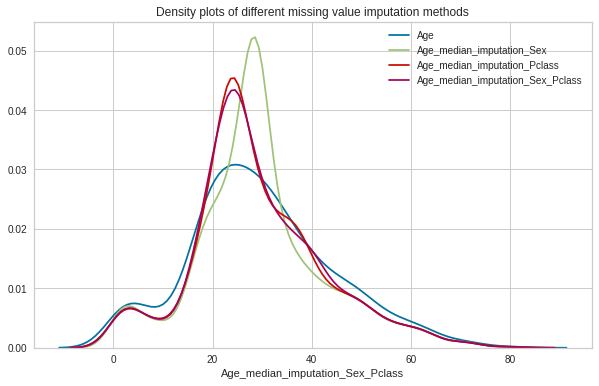

In [69]:
#Comparison between the distributions of the originial and imputed information
fig = plt.figure(figsize=(10,6))
plt.title("Density plots of different missing value imputation methods")
sns.distplot(df_train_imputed['Age'], hist = False, kde = True, label = "Age")
sns.distplot(df_train_imputed["Age_median_imputation_Sex"], hist = False, kde = True, label = "Age_median_imputation_Sex")
sns.distplot(df_train_imputed["Age_median_imputation_Pclass"], hist = False, kde = True, label = "Age_median_imputation_Pclass")
sns.distplot(df_train_imputed["Age_median_imputation_Sex_Pclass"], hist = False, label = "Age_median_imputation_Sex_Pclass")
plt.show()

In [70]:
df_train["Age_median_imputation_Sex_Pclass"] = df_train_imputed["Age_median_imputation_Sex_Pclass"]
df_train = df_train.drop(["Age"],axis = 1)

df_test['Age_median_imputation_Sex_Pclass'] = df_test_imputed['Age_median_imputation_Sex_Pclass']
df_test = df_test.drop(["Age"],axis = 1)

**Checking over missing values after imputation**

In [71]:
#Checking over missing values for the training dataset
print('---Missing values for the Titanic training dataset---')
missingValues(df_train)

---Missing values for the Titanic training dataset---
PassengerId
0
Survived
0
Pclass
0
Sex
0
SibSp
0
Parch
0
Fare
0
Embarked_C
0
Embarked_S
0
Embarked_Q
0
Age_median_imputation_Sex_Pclass
0


In [72]:
#Checking over missing values for the testing dataset
print('---Missing values for the Titanic testing dataset---')
missingValues(df_test)

---Missing values for the Titanic testing dataset---
PassengerId
0
Pclass
0
Sex
0
SibSp
0
Parch
0
Fare
0
Embarked_C
0
Embarked_S
0
Embarked_Q
0
Age_median_imputation_Sex_Pclass
0


# **Preparing our data for ML algorithms**

In [73]:
#Defining features for the ML algorithms
train_features = list(df_train.columns.values)
passengerID_feature = ['PassengerId']
test_features = list(df_test.columns.values)
targets = ['Survived']

In [74]:
train_features.remove('PassengerId')
train_features.remove('Survived')
test_features.remove("PassengerId")

In [75]:
#Separating the variables into features and targets for train and just features for testing
X_train = df_train[train_features]
X_test = df_test[test_features]
y_train = df_train[targets]

# Dimensional Reduction: Principal Component Analysis

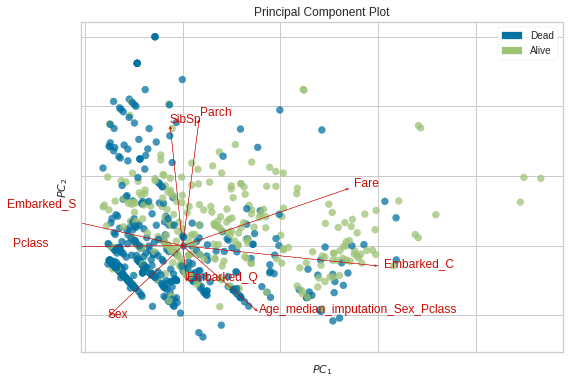

In [76]:
# Dimensional Reduction (PCA) with biplot
classes = ["Dead", "Alive"]
visualizer = PCA(scale = True, proj_features = True, classes = classes)
visualizer.fit_transform(X_train, y_train["Survived"])
visualizer.show()

From the PCA biplot, the Titanic dataset doesn't separate its survival classes really well. Therefore, we cannot interpret the relationship between the dataset and its variables. 

# **Machine Learning Algorithms**
Now lets see how these machine learning algorithms perform in the data.

In [77]:
logit_model = sm.Logit(y_train["Survived"],X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.437985
         Iterations 7
                                 Results: Logit
Model:                    Logit                 Pseudo R-squared:      0.342     
Dependent Variable:       Survived              AIC:                   798.4892  
Date:                     2021-01-20 08:52      BIC:                   841.6203  
No. Observations:         891                   Log-Likelihood:        -390.24   
Df Model:                 8                     LL-Null:               -593.33   
Df Residuals:             882                   LLR p-value:           8.9845e-83
Converged:                1.0000                Scale:                 1.0000    
No. Iterations:           7.0000                                                 
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------

In [78]:
#Logistic Regression ML algorithm on the Titanic dataset
logmodel = LogisticRegression(max_iter=100)
logmodel.fit(X_train, y_train)
y_pred_Logistic = logmodel.predict(X_test[test_features])

print("The Logistic Regression model's accuracy is " + str(round(logmodel.score(X_train, y_train),3)))

The Logistic Regression model's accuracy is 0.804


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [79]:
#Cross validation for the Logistic Regression model
log_model_scores = cross_val_score(logmodel,X_train,y_train, cv = 5, scoring = "accuracy") 
print("Logistic Regression 5-fold CV Scores:", log_model_scores)
print("Logistic Regression 5-fold CV Mean:", log_model_scores.mean())
print("Logistic Regression 5-fold CV Standard Deviation:", log_model_scores.std())

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

Scores: [0.77094972 0.80898876 0.78651685 0.7752809  0.82022472]
Mean: 0.7923921913250894
Standard Deviation: 0.0191686791144665


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The Logistic Regression model achieved the highest accuracy of 80.4%. We can see after 5-fold cross validation, the model achieved a mean accuracy of 79.2%, which is consistent to our accuracy w/out CV.

In [80]:
#Coefficients for the Logistic Regression equation
logmodel.coef_

array([[-1.03082453e+00, -2.53378215e+00, -3.07427784e-01,
        -8.40966413e-02,  2.08829940e-03,  1.59629475e+00,
         9.41565396e-01,  8.43078901e-01, -3.85755027e-02]])

In [81]:
#K-nearest neighbors ML algorithm on the Titanic dataset
k = range(2,10)
for i in k:
    KNN = KNeighborsClassifier(n_neighbors = i)
    KNN.fit(X_train, y_train)
    y_pred_KNN = KNN.predict(X_test)
    print("The K-nearest neighbor model's accuracy for " + str(i) + " neighbors is "  + str(round(KNN.score(X_train, y_train),4)))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


The K-nearest neighbor model's accuracy for 2 neighbors is 0.8316
The K-nearest neighbor model's accuracy for 3 neighbors is 0.844
The K-nearest neighbor model's accuracy for 4 neighbors is 0.8058


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


The K-nearest neighbor model's accuracy for 5 neighbors is 0.8103
The K-nearest neighbor model's accuracy for 6 neighbors is 0.7823


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


The K-nearest neighbor model's accuracy for 7 neighbors is 0.7699
The K-nearest neighbor model's accuracy for 8 neighbors is 0.7643


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


The K-nearest neighbor model's accuracy for 9 neighbors is 0.7666


In [82]:
#Cross validation for the KNN model
KNN_model_scores = cross_val_score(KNN,X_train,y_train, cv = 5, scoring = "accuracy") 
print("KNN 5-fold CV Scores:", KNN_model_scores)
print("KNN 5-fold CV Mean:", KNN_model_scores.mean())
print("KNN 5-fold CV Standard Deviation:", KNN_model_scores.std())

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Scores: [0.6424581  0.66853933 0.71910112 0.73595506 0.73033708]
Mean: 0.6992781369656644
Standard Deviation: 0.03708421795634313


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Even though the KNN model achieved the highest accuracy of 84.4% after three neighbors, after 5-fold cross validation, we can see that it has an mean accuracy of 69.9%, which is significantly lower than the accuracy w/out CV. By observation, we can see that the model was overfitting and CV was the appropriate approach to be able to check this.

In [83]:
#Gaussian Naive Bayes ML Algorithm on the Titanic dataset
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print("The Gaussian Naive Bayes model's accuracy is " + str(round(gnb.score(X_train, y_train),2)))

The Gaussian Naive Bayes model's accuracy is 0.79


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [84]:
#Cross validation for the KNN model
gnb_model_scores = cross_val_score(gnb,X_train,y_train, cv = 5, scoring = "accuracy") 
print("Gaussian Naive Bayes 5-fold CV Scores:", gnb_model_scores)
print("Gaussian Naive Bayes 5-fold CV Mean:", gnb_model_scores.mean())
print("Gaussian Naive Bayes 5-fold CV Standard Deviation:", gnb_model_scores.std())

Scores: [0.68715084 0.7752809  0.79775281 0.79213483 0.80898876]
Mean: 0.7722616282719228
Standard Deviation: 0.04392400168246561


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

The Gaussian Bayes model achieved the highest accuracy of 79%. We can see after 5-fold cross validation, the model achieved a mean accuracy of 77.2%, which is consistent to our accuracy w/out CV.

In [85]:
test_predictions = logmodel.predict(df_test[test_features])
submission = pd.DataFrame({
    "PassengerId": df_test["PassengerId"],
    "Survived": test_predictions
})

From our results, we can see that the Logistic Regression model achieved the highest accuracy with 5-fold cross validation being applied on it. We will submit our predictions using that ML model.

In [86]:
submission.to_csv('prediction_submission.csv', index = False)